<a href="https://colab.research.google.com/github/sol-commits/deep_learning/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우
- 머신러닝을 위한 오픈소스 플랫폼
- 구글이 주도적으로 개발 -> 코랩에는 기본 장착
- `Keras`라고 하는 고수준 API를 병합

- Tensor: 벡터나 행렬을 의미
- Graph: 텐가 흐르는 경로(혹은 공간)
- Tensor Flow: 텐서가 Graph를 통해 흐른다

# Age, Weight, Blood Fat 데이터

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
raw_data = np.genfromtxt('https://people.sc.fsu.edu/~jburkardt/datasets/regression/x09.txt', skip_header=36)
raw_data # index, seperator, weight, age, blood fat 으로 구성

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

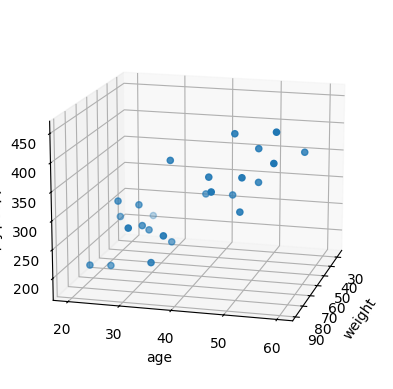

In [ ]:
xs = np.array(raw_data[:, 2], dtype=np.float32)
ys = np.array(raw_data[:, 3], dtype=np.float32)
zs = np.array(raw_data[:, 4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('weight')
ax.set_ylabel('age')
ax.set_zlabel('blood fat')
ax.view_init(15, 15)
plt.show()


## 이 데이터의 딥러닝 목표
- 나이와 몸무게를 알려주면, 주어진 데이터 기준의 blood fat을 얻는 것! -> Linear Regression


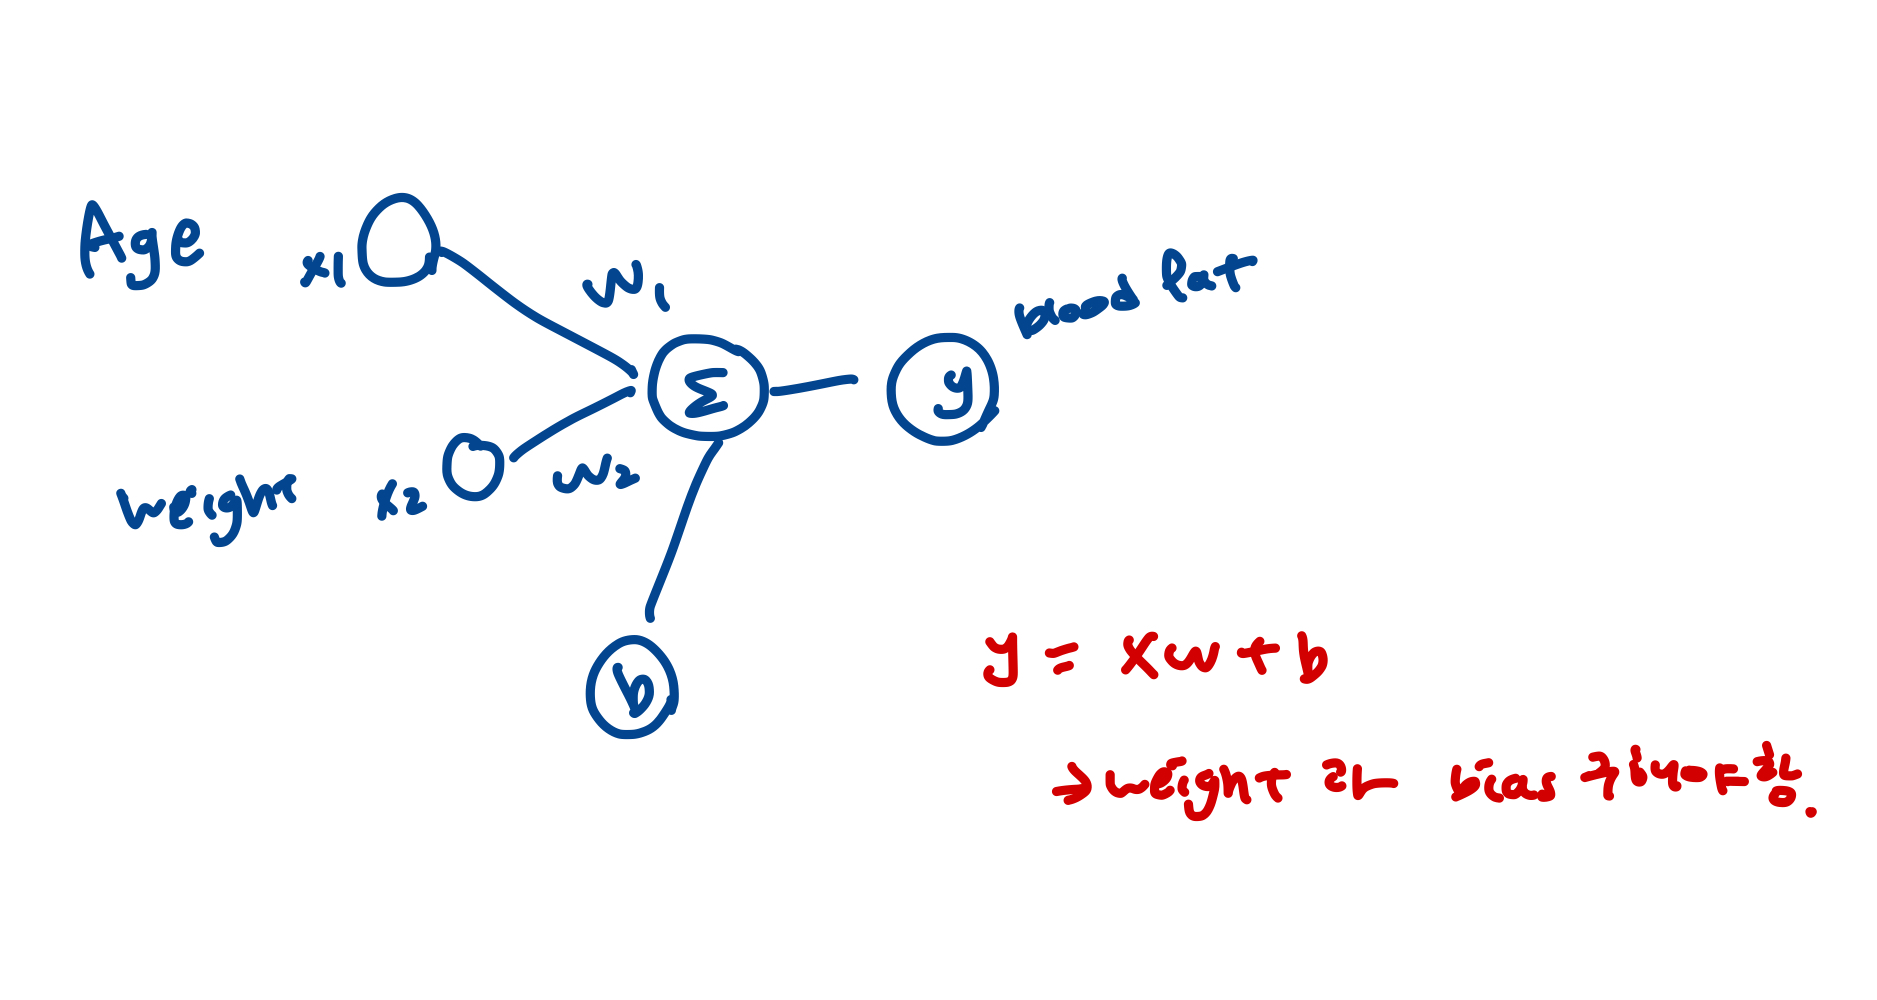

In [ ]:
raw_data.shape

(25, 5)

In [ ]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)

y_data = y_data.reshape((25, 1))

## 모델 생성

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(2, ))
])

model.compile(optimizer='rmsprop', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- 찾아야할 parameter 3개 : W1, W2, b

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

## 학습

- 5000번 학습

In [ ]:
hist = model.fit(x_data, y_data, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 1863.8031
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 1863.7990
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 1863.7948
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 1863.7908
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 1863.7863
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1863.7822
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1863.7780
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 1863.7739
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 1863.7694
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 1863.7656
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 1863.7617
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 1863.7577
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 1863.7529
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 1863.7488
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━

## loss

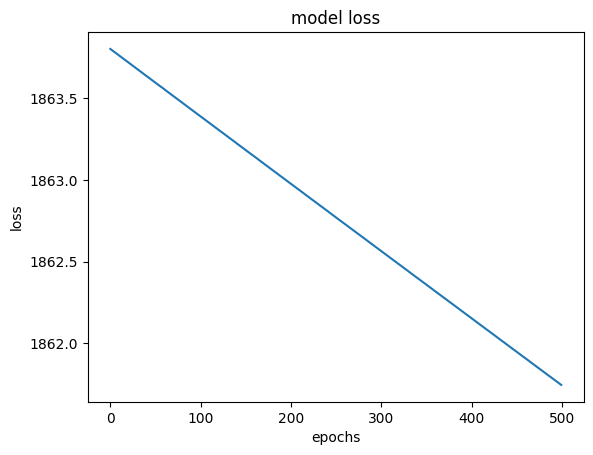

In [ ]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

## predict

In [ ]:
# 몸무게 100에 44살 된 사람의 blood fat은?
model.predict(np.array([100, 44]).reshape(1, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[374.895]], dtype=float32)

## 가중치와 bias

In [ ]:
W_, b_ = model.get_weights()
print('Weight is :', W_)
print('bias is :', b_)

Weight is : [[1.2451674]
 [5.5694933]]
bias is : [5.3205404]


## 모델이 잘 만들어졌는지 확인

In [ ]:
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

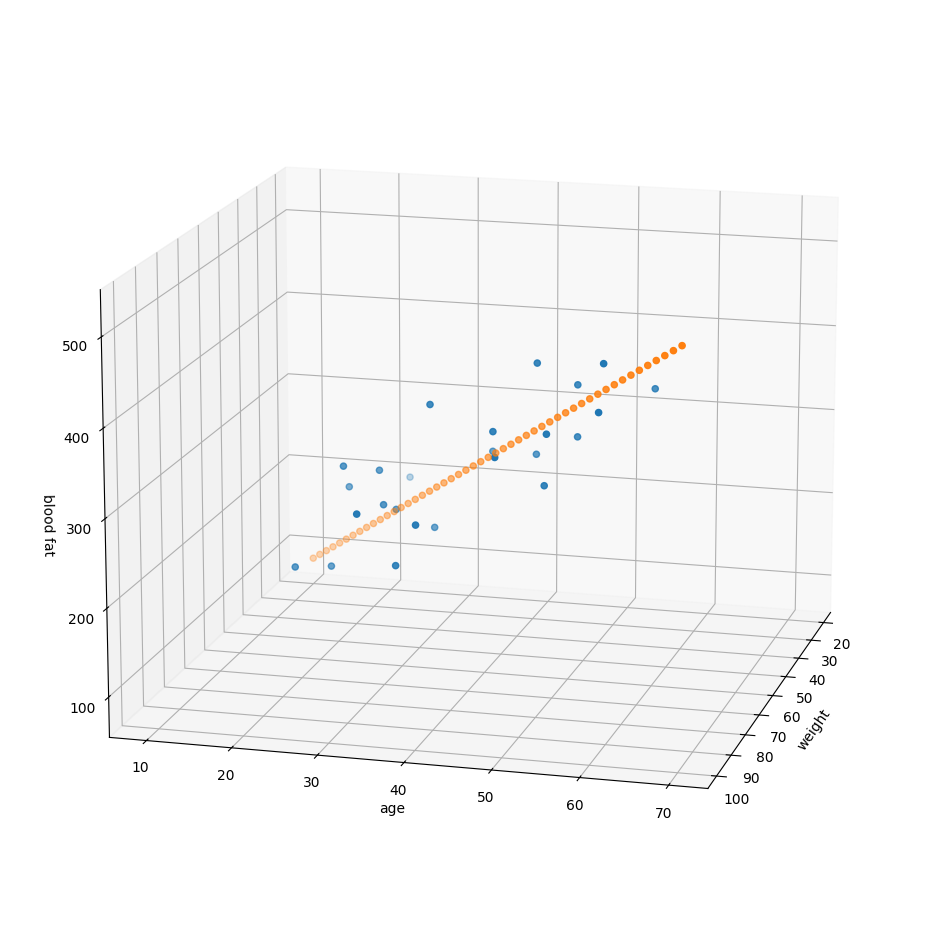

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('weight')
ax.set_ylabel('age')
ax.set_zlabel('blood fat')
ax.view_init(15, 15)
plt.show()

# XOR 문제

선형 모델로는 XOR 문제를 풀 수 없음

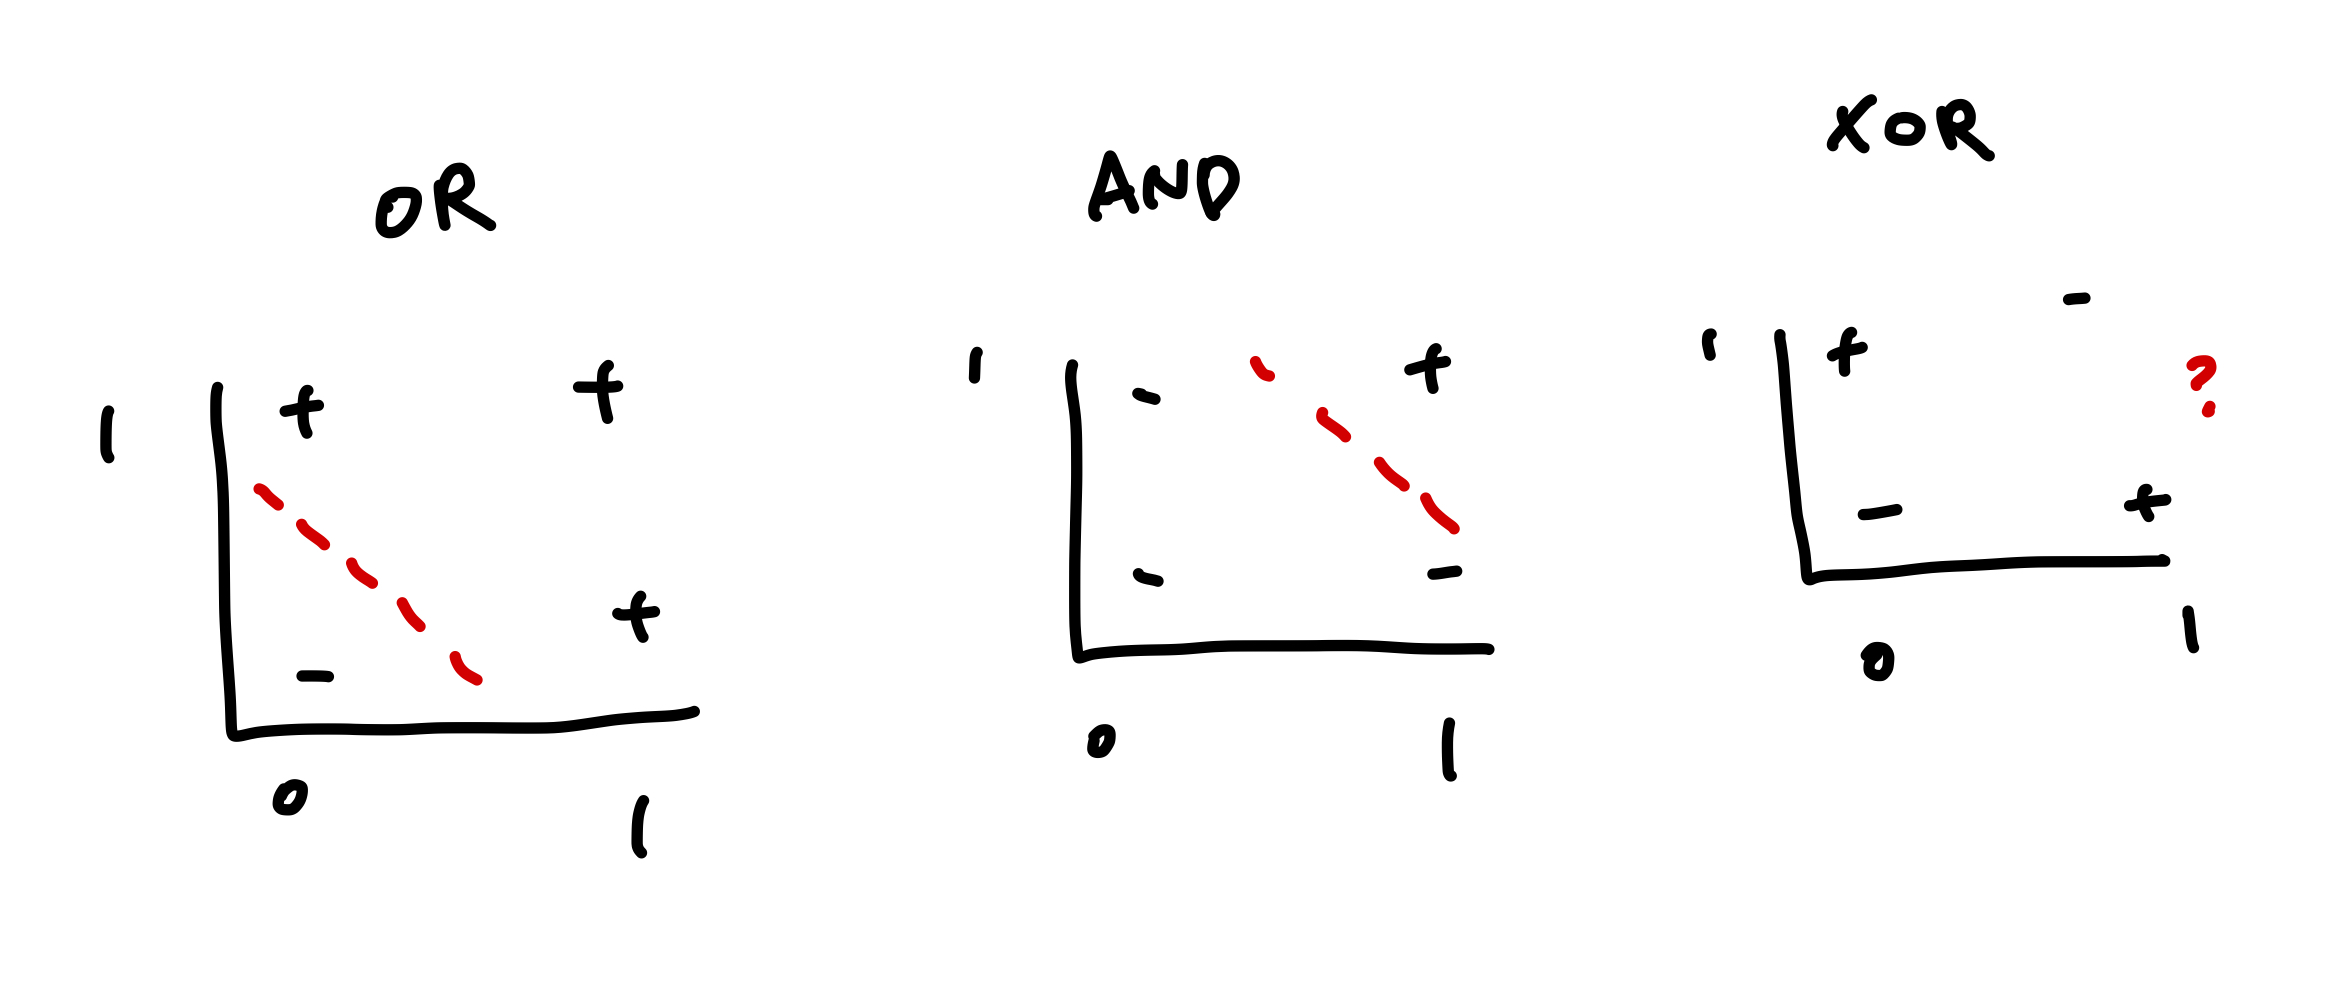

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]])
y = np.array([[0], [1], [1], [0]])

## 모델 생성

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.9), loss='mse')

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

## 학습

In [48]:
hist = model.fit(X, y, epochs=500, batch_size=1) # batch_size = 한번에 학습에 사용될 데이터의 수

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2684  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2609 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2530 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2864 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2751 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2855 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2670 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2704 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2672 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2832 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2755 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2704 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2708 
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2579 
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2715 
Epoch 16/500
4/4 ━

## predict

In [49]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[0.04792567],
       [0.9456943 ],
       [0.94577515],
       [0.07087904]], dtype=float32)

## loss

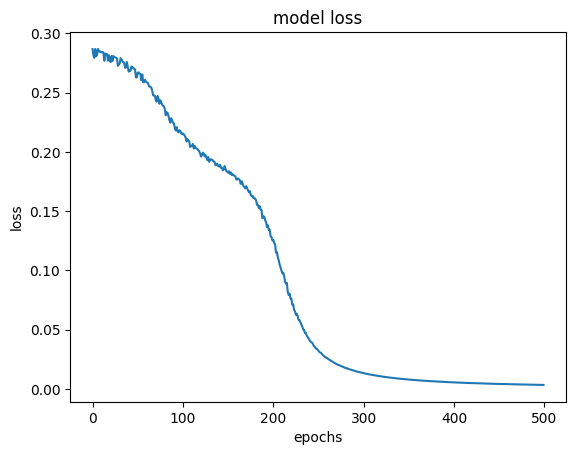

In [51]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

# 분류

In [52]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

## one hot encoding

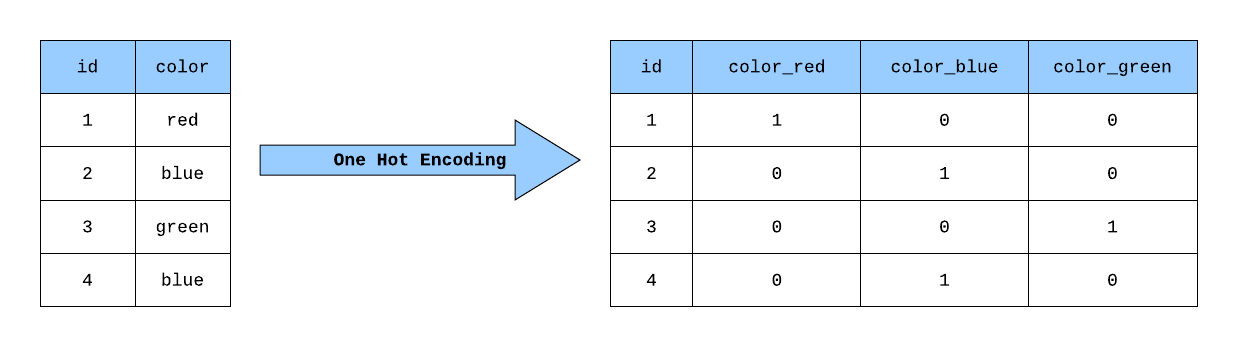

[출처](https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39)

In [54]:
 from sklearn.preprocessing import OneHotEncoder

 enc = OneHotEncoder(sparse_output=False,handle_unknown='ignore') # sparse: 메모리를 아끼도록 해줌(1이 있는 자리의 위치만 저장)
 enc.fit(y.reshape(len(y), 1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [55]:
enc.categories_

[array([0, 1, 2])]

In [56]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)

## 모델 생성

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4, ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,371 (9.26 KB)

 Trainable params: 2,371 (9.26 KB)

 Non-trainable params: 0 (0.00 B)

## 학습

In [62]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3192 - loss: 1.1455
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4021 - loss: 1.0001 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7131 - loss: 0.9263 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7025 - loss: 0.8433  
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7358 - loss: 0.7790  
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6948 - loss: 0.7192 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6783 - loss: 0.7069  
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8665 - loss: 0.6324 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8869 - loss: 0.6089  
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9010 - loss: 0.5719  
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8498 - loss: 0.5264  
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8121 

## accuracy

In [67]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9667 - loss: 0.1130


[0.11300014704465866, 0.9666666388511658]

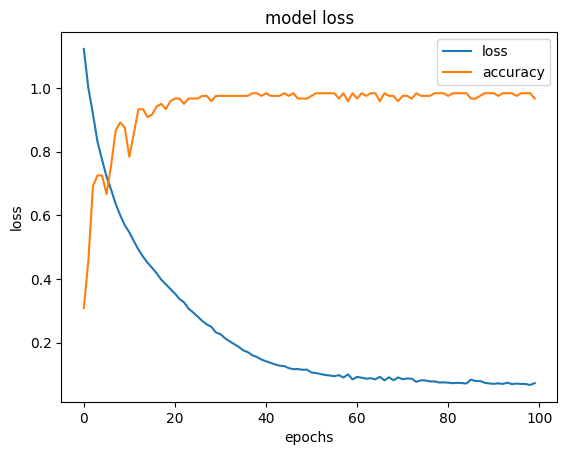

In [66]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()